In [65]:
import csv
import pandas as pd

# df = pd.read_csv('restaurant.csv', header = None)
# # df2 = df.mask(df == '')
# # df2 = df2.mask(df2 == ' ')
# df2 = df2.dropna()
# df2
# df2.to_csv('rest_data.csv', index = False, header = False)
with open('rest_data.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)


,0,1,2,3,4,5,6,7,8
902,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,House white wine 75cl,Special Fried Rice,Curry,Lamb Biryani,Vindaloo - Prawn,Korma - Lamb
1395,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,House white wine 75cl,Special Fried Rice,Curry,Lamb Biryani,Vindaloo - Prawn,Korma - Lamb
4469,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,House white wine 75cl,Special Fried Rice,Curry,Lamb Biryani,Vindaloo - Prawn,Korma - Lamb
4803,Plain Rice,Bhuna - Chicken,Chicken Tikka Balti,House white wine 75cl,Special Fried Rice,Curry,Lamb Biryani,Vindaloo - Prawn,Korma - Lamb


In [66]:
pip install mlxtend --upgrade

Note: you may need to restart the kernel to use updated packages.


In [67]:
# data preprocessing

# import mlxtend.frequent_patterns 
# import mlxtend.preprocessing

# # encode_=mlxtend.preprocessing.TransactionEncoder()
# # encode_arr=encode_.fit_transform(df2)
# # encode_arr = encode_.fit(df2).transform(df2)
# # df = pd.read_csv('rest_data.csv', header=None,sep='\s+')
# # df_out = df.apply(lambda x: list(x.dropna().values), axis=1).tolist()

# encoder = mlxtend.preprocessing.TransactionEncoder()
# encoder_arr = encoder.fit(df2.values.tolist()).transform(df2.values.to_list())
# encoder_arr = dataset.astype('int')
# print(encode_arr)

import mlxtend.frequent_patterns 
import mlxtend.preprocessing

encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(data)

print(encode_arr)


[[ True  True False ... False False False]
 [ True  True False ...  True  True False]
 [ True False  True ...  True False False]
 ...
 [ True False False ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True False False ... False  True  True]]


In [73]:
# converting list to dataframe
import pandas as pd
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df = encode_df.drop(encode_df.columns[0], axis = 1)
encode_df

,Bhuna - Chicken,Chicken Tikka Balti,Curry,House white wine 75cl,Korma - Lamb,Lamb Biryani,Plain Rice,Special Fried Rice,Vindaloo - Prawn
0,True,False,False,False,True,False,False,False,False
1,True,False,True,False,True,False,True,True,False
2,False,True,False,False,False,False,True,False,False
3,True,False,True,True,False,False,False,True,True
4,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...
10995,False,False,False,True,False,False,True,True,True
10996,True,True,True,False,False,True,False,True,False
10997,False,False,False,True,True,False,True,True,False
10998,True,True,True,False,True,False,True,True,True


In [74]:
#apriori algorithm

md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.01, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.455000,(Bhuna - Chicken)
1,0.448545,(Chicken Tikka Balti)
2,0.462909,(Curry)
3,0.456455,(House white wine 75cl)
4,0.441091,(Korma - Lamb)
5,0.457727,(Lamb Biryani)
6,0.463091,(Plain Rice)
7,0.462000,(Special Fried Rice)
8,0.451364,(Vindaloo - Prawn)
9,0.209636,"(Bhuna - Chicken, Chicken Tikka Balti)"


In [75]:
#creating rules with confidence metric

rules=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="confidence",min_threshold=0.06,support_only=False)

rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bhuna - Chicken),(Chicken Tikka Balti),0.455000,0.448545,0.209636,0.460739,1.027185,0.005548,1.022612
1,(Chicken Tikka Balti),(Bhuna - Chicken),0.448545,0.455000,0.209636,0.467369,1.027185,0.005548,1.023223
2,(Bhuna - Chicken),(Curry),0.455000,0.462909,0.208182,0.457542,0.988407,-0.002442,0.990107
3,(Curry),(Bhuna - Chicken),0.462909,0.455000,0.208182,0.449725,0.988407,-0.002442,0.990414
4,(Bhuna - Chicken),(House white wine 75cl),0.455000,0.456455,0.206273,0.453347,0.993191,-0.001414,0.994315
5,(House white wine 75cl),(Bhuna - Chicken),0.456455,0.455000,0.206273,0.451902,0.993191,-0.001414,0.994348
6,(Bhuna - Chicken),(Korma - Lamb),0.455000,0.441091,0.205091,0.450749,1.021896,0.004395,1.017585
7,(Korma - Lamb),(Bhuna - Chicken),0.441091,0.455000,0.205091,0.464963,1.021896,0.004395,1.018621
8,(Bhuna - Chicken),(Lamb Biryani),0.455000,0.457727,0.211909,0.465734,1.017493,0.003643,1.014987
9,(Lamb Biryani),(Bhuna - Chicken),0.457727,0.455000,0.211909,0.462959,1.017493,0.003643,1.014821


In [76]:
#creating rules with lift metric

rules2=mlxtend.frequent_patterns.association_rules(
md_minsup, metric="lift",min_threshold=0.06,support_only=False)

rules2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bhuna - Chicken),(Chicken Tikka Balti),0.455000,0.448545,0.209636,0.460739,1.027185,0.005548,1.022612
1,(Chicken Tikka Balti),(Bhuna - Chicken),0.448545,0.455000,0.209636,0.467369,1.027185,0.005548,1.023223
2,(Bhuna - Chicken),(Curry),0.455000,0.462909,0.208182,0.457542,0.988407,-0.002442,0.990107
3,(Curry),(Bhuna - Chicken),0.462909,0.455000,0.208182,0.449725,0.988407,-0.002442,0.990414
4,(Bhuna - Chicken),(House white wine 75cl),0.455000,0.456455,0.206273,0.453347,0.993191,-0.001414,0.994315
5,(House white wine 75cl),(Bhuna - Chicken),0.456455,0.455000,0.206273,0.451902,0.993191,-0.001414,0.994348
6,(Bhuna - Chicken),(Korma - Lamb),0.455000,0.441091,0.205091,0.450749,1.021896,0.004395,1.017585
7,(Korma - Lamb),(Bhuna - Chicken),0.441091,0.455000,0.205091,0.464963,1.021896,0.004395,1.018621
8,(Bhuna - Chicken),(Lamb Biryani),0.455000,0.457727,0.211909,0.465734,1.017493,0.003643,1.014987
9,(Lamb Biryani),(Bhuna - Chicken),0.457727,0.455000,0.211909,0.462959,1.017493,0.003643,1.014821


In [78]:
#prepare scatter plot

import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as plt

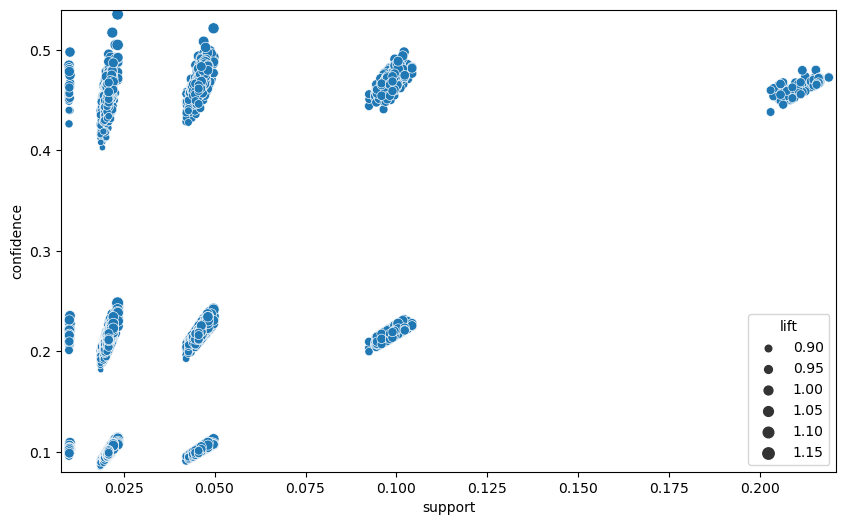

In [79]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

This is a 3D scatter plot which has support, confidence and lift showing association rules with confidence as its metric.
As i look at the graph the i see a pattern or correlation between some rules as there are distinct clusters.
I suppose thats because restaurants have menus containing different courses of meals i suppose those clusters are related courses of meal customers may have.